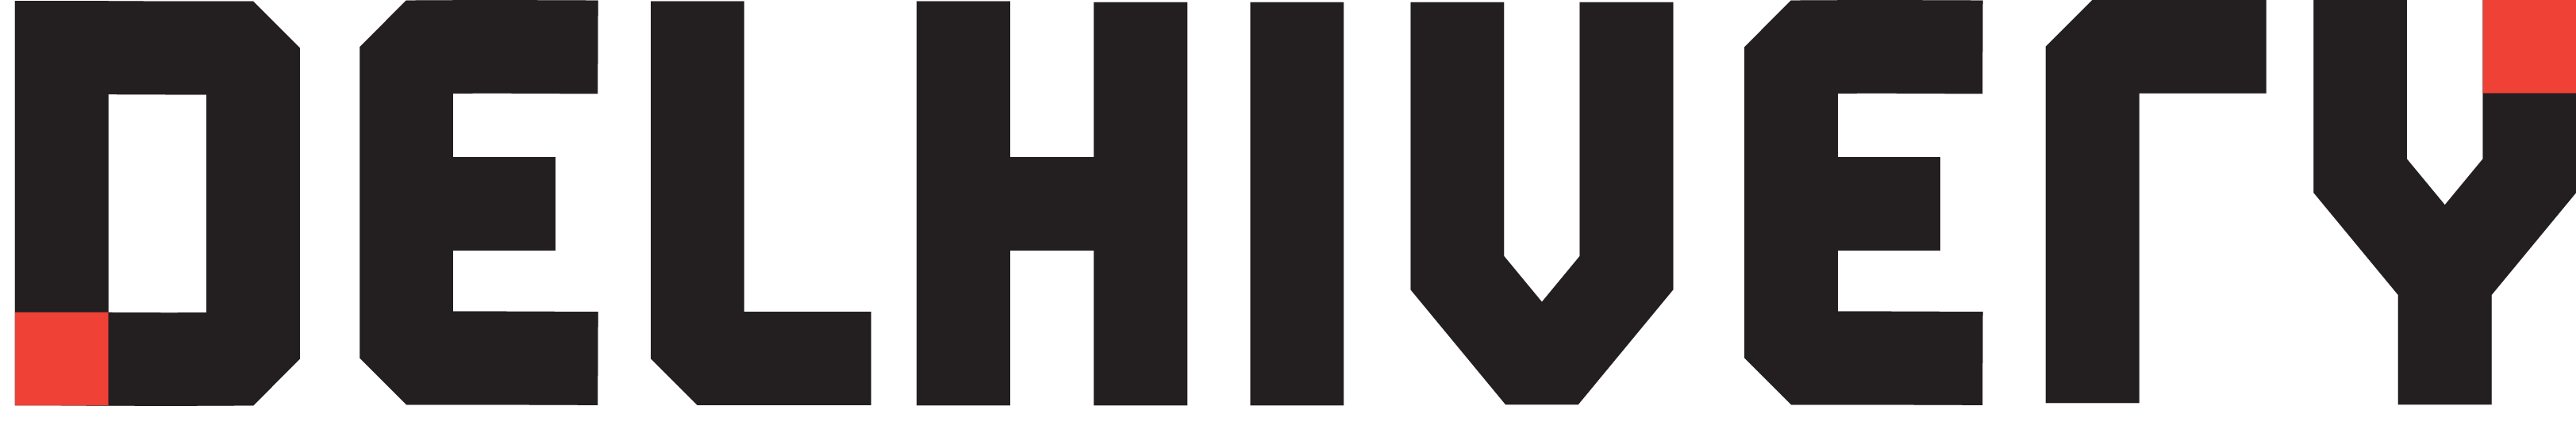

**DELHIVERY BUSINESS CASE - FEATURE ENGINEERING**

Problem Statement -

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

*Importing relevant python libraries*

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

*Dataset Exploration*

In [136]:
df = pd.read_csv('Documents/CHIRAG DAHIYA/DSML/Delhivery/delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [8]:
# Shape of Data
df.shape

(144867, 24)

In [4]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

*Comments:*

The DataFrame has a total of 144,867 entries (rows) and 24 columns.
 
There are 12 columns with object (string) data type.
 
There is 1 column with int64 (integer) data type.

There are 10 columns with float64 (floating-point) data type.

There is 1 column with bool (boolean) data type.

Column-wise non-null count indicates the number of non-missing values for each column.
Columns 'source_name' and 'destination_name' have missing values:
- 'source_name' has 293 missing values.
- 'destination_name' has 261 missing values.


#### let's remove the null values

In [137]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [138]:
# Data set info after removal of Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

Earlier, the total number of rows was 1,44,867. After the treatment of null values, it is 1,44,316.

#### As the same trip has been segmented into multiple number of trips, hence increasing the number of rows, so we shall first merge the rows on the basis of a unique identifier which we will create using trip ID, source name and destination name, so as to perform proper statistical analysis and feature engineering, And remove redundancy and duplication of data.

#### Before merging the Rows, we must first preserve information so as to use later, so let's first create three new columns, using the segment columns, and so as to create a cumulative sum Of actual time OSRM time and OSRM distance, for each trip ID.

In [139]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_time','segment_osrm_distance']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
    
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144311,92.0,94.0,65.3487
144312,118.0,115.0,82.7212
144313,138.0,149.0,103.4265
144314,155.0,176.0,122.3150


In [140]:
df = df[['segment_key','data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'segment_actual_time','segment_actual_time_sum',
       'osrm_time','segment_osrm_time','segment_osrm_time_sum',
       'osrm_distance','segment_osrm_distance','segment_osrm_distance_sum',
         'factor','segment_factor'
       ]]

In [143]:
pd.set_option('display.max_columns', None)
df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,segment_actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance,segment_osrm_distance_sum,factor,segment_factor
0,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,14.0,14.0,11.0,11.0,11.0,11.9653,11.9653,11.9653,1.272727,1.272727
1,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,10.0,24.0,20.0,9.0,20.0,21.7243,9.7590,21.7243,1.200000,1.111111
2,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,16.0,40.0,28.0,7.0,27.0,32.5395,10.8152,32.5395,1.428571,2.285714
3,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,21.0,61.0,40.0,12.0,39.0,45.5620,13.0224,45.5619,1.550000,1.750000
4,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,6.0,67.0,44.0,5.0,44.0,54.2181,3.9153,49.4772,1.545455,1.200000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   segment_key                     144316 non-null  object 
 1   data                            144316 non-null  object 
 2   trip_creation_time              144316 non-null  object 
 3   route_schedule_uuid             144316 non-null  object 
 4   route_type                      144316 non-null  object 
 5   trip_uuid                       144316 non-null  object 
 6   source_center                   144316 non-null  object 
 7   source_name                     144316 non-null  object 
 8   destination_center              144316 non-null  object 
 9   destination_name                144316 non-null  object 
 10  od_start_time                   144316 non-null  object 
 11  od_end_time                     144316 non-null  object 
 12  start_scan_to_en

Let's create a dictionary to merge the rows on the basis of segment key identifier, where the dictionary contains the subsequent aggregations, for group by function.

In [148]:
segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'segment_actual_time_sum' : 'last',
    'osrm_time' : 'last',
    'segment_osrm_time_sum' : 'last',
    'osrm_distance' : 'last',
    'segment_osrm_distance_sum' : 'last',
}

In [150]:
segment = df.groupby('segment_key').agg(segment_dict).reset_index()
segment = segment.sort_values(by=['trip_uuid','od_end_time'], ascending=[True,True]).reset_index(drop=True)
segment

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum
0,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,820.0,388.0,474.0,544.8027,649.8528
1,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,728.0,329.0,534.0,446.5496,670.6205
2,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,95.0,42.0,39.0,56.9116,55.9899
3,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,46.0,26.0,26.0,28.1994,28.1995
4,trip-153671043369099517IND562132AAAIND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,2700.0,1528.0,1710.0,2072.8556,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,49.0,41.0,42.0,42.5213,42.1431
26218,trip-153861115439069069IND627657AAAIND628613AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,32.0,31.0,30.0,25.7087,25.7087
26219,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,89.0,48.0,77.0,40.6080,78.5869
26220,trip-153861118270144424IND583201AAAIND583119AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,41.0,26.0,25.0,28.0484,28.0484


#### let's further merge the data set to perform The Rest of statistical tasks and feature engineering on.

In [188]:
trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'osrm_time' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'osrm_distance' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    
}

In [243]:
trip = segment.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,od_start_time,od_end_time,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),421.0,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),347.0,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324


In [244]:
# reintroducing the factor column 
trip['factor'] = trip['actual_time']/trip['osrm_time']
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,od_start_time,od_end_time,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733,2.178522
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678,1.923563
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),421.0,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),347.0,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860


#### We'll treat the factor column as our target column, where we have to minimise the factor number, preferrably equal to 1 or less than 1

#### but before that, lets first perform the statistical analysis on our dataset, and to perform which, we have to do some features engineering to make meaningfull columns out of the exisiting columns, 
#### Such as, extracting year, months and days out of the order dates, 
#### exctracting city names, state names and location pincodes from our source and destination center names


In [245]:
# Let's first convert date time columns data type to date time
trip.trip_creation_time = pd.to_datetime(trip.trip_creation_time)
trip.od_start_time = pd.to_datetime(trip.od_start_time)
trip.od_end_time = pd.to_datetime(trip.od_end_time)

In [223]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   od_start_time                   14787 non-null  datetime64[ns]
 6   od_end_time                     14787 non-null  datetime64[ns]
 7   source_center                   14787 non-null  object        
 8   source_name                     14787 non-null  object        
 9   destination_center              14787 non-null  object        
 10  destination_name                14787 non-null  object        
 11  st

In [246]:
trip['od_time_diff'] = (trip.od_end_time-trip.od_start_time).dt.total_seconds()/60
trip.drop(columns=['od_end_time','od_start_time'],inplace=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor,od_time_diff
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733,2.178522,2260.109800
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941,181.611874
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678,1.923563,3934.362520
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333,100.494935
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530,718.349042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710,405.485842
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000,60.590521
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),421.0,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000,422.119867
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),347.0,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860,348.512862


In [216]:
# Extracting the state names,city names,place names and area code 
# from source names and destination namess
trip['destination_name'] = trip['destination_name'].str.lower() # lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]
    
    return state[:-1] #removing ')' from ending

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]
    
    city = city.split('_')[0]
    
    # Now daling with edge cases
          
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar':
        return 'bhopal'
    if city == 'mumbai antop hill':
        return 'mumbai'

    return city

def place2city_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]
    
def place2code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

In [247]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [248]:
trip = trip[['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_state', 'source_city', 'source_place',
       'source_code', 'destination_center',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'start_scan_to_end_scan', 'od_time_diff',
       'actual_distance_to_destination', 'actual_time',
       'segment_actual_time_sum', 'osrm_time', 'segment_osrm_time_sum',
       'osrm_distance', 'segment_osrm_distance_sum', 'factor' ]]
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,2259.0,2260.109800,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733,2.178522
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Karnataka,Tumkur,Veersagr,I,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,180.0,181.611874,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,3933.0,3934.362520,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678,1.923563
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Maharashtra,Mumbai Hub,Mumbai,none,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,100.0,100.494935,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Karnataka,Bellary,Bellary,none,IND583101AAA,Karnataka,Bellary,Bellary,none,717.0,718.349042,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,257.0,405.485842,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,Haryana,FBD,Balabhgarh,DPC,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,60.0,60.590521,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,421.0,422.119867,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,347.0,348.512862,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860


In [251]:
# Now Let's extract year, months, days, hour, week and day of week from our data

trip.loc[:,'trip_year'] = trip['trip_creation_time'].dt.year
trip.loc[:,'trip_monthday'] = trip['trip_creation_time'].dt.strftime('%m-%d')
trip.loc[:,'trip_month'] = trip['trip_creation_time'].dt.month
trip.loc[:,'trip_hour'] = trip['trip_creation_time'].dt.hour
trip.loc[:,'trip_day'] = trip['trip_creation_time'].dt.day
trip.loc[:,'trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip.loc[:,'trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [252]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor,trip_year,trip_monthday,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,2259.0,2260.109800,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733,2.178522,2018,09-12,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Karnataka,Tumkur,Veersagr,I,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,180.0,181.611874,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941,2018,09-12,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,3933.0,3934.362520,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678,1.923563,2018,09-12,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Maharashtra,Mumbai Hub,Mumbai,none,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,100.0,100.494935,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333,2018,09-12,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Karnataka,Bellary,Bellary,none,IND583101AAA,Karnataka,Bellary,Bellary,none,717.0,718.349042,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530,2018,09-12,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,257.0,405.485842,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710,2018,10-03,10,23,3,40,2
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,Haryana,FBD,Balabhgarh,DPC,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,60.0,60.590521,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000,2018,10-03,10,23,3,40,2
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,421.0,422.119867,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000,2018,10-03,10,23,3,40,2
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,347.0,348.512862,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860,2018,10-03,10,23,3,40,2


In [254]:
trip = trip[['data', 'trip_year','trip_monthday', 'trip_month', 'trip_day','trip_hour', 'trip_week', 'trip_dayofweek', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_state', 'source_city',
       'source_place', 'source_code', 'destination_center',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'start_scan_to_end_scan', 'od_time_diff',
       'actual_distance_to_destination', 'actual_time',
       'segment_actual_time_sum', 'osrm_time', 'segment_osrm_time_sum',
       'osrm_distance', 'segment_osrm_distance_sum', 'factor']]
trip.head()

,data,trip_year,trip_monthday,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek,route_schedule_uuid,route_type,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor
0,training,2018,09-12,9,12,0,37,2,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,2259.0,2260.109800,824.732854,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733,2.178522
1,training,2018,09-12,9,12,0,37,2,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Karnataka,Tumkur,Veersagr,I,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,180.0,181.611874,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941
2,training,2018,09-12,9,12,0,37,2,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,3933.0,3934.362520,1927.404273,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678,1.923563
3,training,2018,09-12,9,12,0,37,2,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Maharashtra,Mumbai Hub,Mumbai,none,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,100.0,100.494935,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333
4,training,2018,09-12,9,12,0,37,2,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Karnataka,Bellary,Bellary,none,IND583101AAA,Karnataka,Bellary,Bellary,none,717.0,718.349042,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530


In [255]:
# Let's convert column data types to their relevant data types
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14787 non-null  object 
 1   trip_year                       14787 non-null  int64  
 2   trip_monthday                   14787 non-null  object 
 3   trip_month                      14787 non-null  int64  
 4   trip_day                        14787 non-null  int64  
 5   trip_hour                       14787 non-null  int64  
 6   trip_week                       14787 non-null  UInt32 
 7   trip_dayofweek                  14787 non-null  int64  
 8   route_schedule_uuid             14787 non-null  object 
 9   route_type                      14787 non-null  object 
 10  trip_uuid                       14787 non-null  object 
 11  source_center                   14787 non-null  object 
 12  source_state                    

In [260]:
trip[['trip_year','trip_monthday','trip_month','trip_day','trip_hour','trip_week','trip_dayofweek']].astype('object')

,trip_year,trip_monthday,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek
0,2018,09-12,9,12,0,37,2
1,2018,09-12,9,12,0,37,2
2,2018,09-12,9,12,0,37,2
3,2018,09-12,9,12,0,37,2
4,2018,09-12,9,12,0,37,2
...,...,...,...,...,...,...,...
14782,2018,10-03,10,3,23,40,2
14783,2018,10-03,10,3,23,40,2
14784,2018,10-03,10,3,23,40,2
14785,2018,10-03,10,3,23,40,2


In [261]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14787 non-null  object 
 1   trip_year                       14787 non-null  object 
 2   trip_monthday                   14787 non-null  object 
 3   trip_month                      14787 non-null  object 
 4   trip_day                        14787 non-null  object 
 5   trip_hour                       14787 non-null  object 
 6   trip_week                       14787 non-null  object 
 7   trip_dayofweek                  14787 non-null  object 
 8   route_schedule_uuid             14787 non-null  object 
 9   route_type                      14787 non-null  object 
 10  trip_uuid                       14787 non-null  object 
 11  source_center                   14787 non-null  object 
 12  source_state                    

#### Now we shall perform the statistical analysis

In [279]:
dic = {}
for i in trip:
    if trip[i].dtype == 'object':
#         print(i,':',trip[i].value_counts().index[-1],':',trip[i].value_counts().iloc[-1])
        dic.update({i:[trip[i].value_counts().index[-1],trip[i].value_counts().iloc[-1]]})

In [278]:
# for object type columns
trip.describe(include='object').append(pd.DataFrame(dic,index=['least','freq']))

,data,trip_year,trip_monthday,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek,route_schedule_uuid,route_type,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,1,22,2,22,24,4,7,1497,2,14787,865,29,671,718,33,951,32,767,799,34
top,training,2018,09-18,9,18,22,38,2,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153812945464924524,IND000000ACB,Maharashtra,Bengaluru,Central,HB,IND000000ACB,Maharashtra,Bengaluru,Central,H
freq,10645,14787,791,13011,791,1123,5001,2731,53,8906,1,937,2682,1015,1039,3305,813,2591,1056,924,2750
least,test,2018,09-30,10,30,10,40,6,thanos::sroute:2af16556-e1ff-47fc-96a6-69f90ee...,FTL,trip-153825331007748550,IND140501AAA,Arunachal Pradesh,Hazaribag,Pbroad,9,IND678683AAA,Nagaland,Upleta,MotiDPP,CP
freq,4142,14787,506,1776,506,262,1776,1753,1,5881,1,1,4,1,1,1,1,1,1,1,1


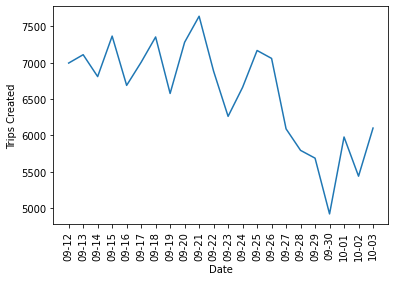

In [66]:
# Let's analyse trip_creation_time column Month And Day wise
monthday = df['trip_creation_time'].dt.strftime('%m-%d').value_counts().sort_index()
sb.lineplot(x=monthday.index,y=monthday.values)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Trips Created')
plt.show()

1. It can be observed in the above graph that there is a declining trend in the number of trips created from September 12th - 3rd of October. The local Maxima is somewhere around 21st of September and the local minima is around 30th of September. After which the number of trips are starting to gain momentum but from this graph again, we can infer that people tend to order or create trips a lot less by the end of the month.

Observations:
1. trip_year: The data belongs to only a single year, ie, 2018.
2. trip_month: The data belongs to only two months which are September and October, out of which the month of September is the month with the highest frequency.
2. trip_monthday: 18th of september is the day with highest frequency, ie, 791, and 30th of September is the day with the lowest frequency which is 506.
3. trip_day: Over all,the date 18th is also the most frequent date of all the dates, and date 30th is again the date with the lowest frequency.
4. trip_hour: 10 PM. Is the most frequent time of the day when the delivery orders are created, ie, 1123, and very much in contradiction, 10 AM in the morning is the time when the least number of delivery orders are created. The frequency for the same is 262.
5. trip_week: The 38th week of the year is the week when the majority of the delivery orders are created. At least amongst the two months which are September and October. The frequency for the same is 5000, and week 40 is the week with the least number of orders created, frequency for the same is 1776.
6. trip_dayofweek: the day of the week in which the majority of the orders are created is second day of the week that is a Tuesday and the frequency for the same is 2731, whereas the day of the week with the least number of orders created as Saturday with a frequency of 1753.
7. route_schedule_uuid: There are in total 1497 unique route schedules out of which, 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...' is the route schedule with the most number of frequencies, whereas, 'thanos::sroute:2af16556-e1ff-47fc-96a6-69f90ee...' is the route schedule with the least number of frequencies.
8. route_type: There are only two routes, ie, FTL and Carting, amingst the two, Carting is more prevalent, frequency for FTL is 5881 and frequency for Carting is 8906.
9. trip_uuid: Every trip uuid is unique for each order delivery.
10. source_center: The most visited source center is IND000000ACB and the least visited is IND140501AAA, amongst others.
11. source_state: The source state with over all the highest number of traffic is Maharashtra and the State with the least amount of traffic is Arunachal Pradesh.
12. source_city: Begaluru is the city with over all highest traffic where aa Hazaribag has the least traffic. 
13. destination_center: The most visited destination center is again IND000000ACB and the least visited destination center is IND678683AAA.
14. destination_state: The most frequented state with over all most traffic is again Maharashtra, where as, Nagaland is the least frequented one.
15. destination_city: Bengaluru is again the most frequented city with the mist traffic, where as, Upleta has the least traffic as a destination city.

In [280]:
# For the numeric type columns
trip.describe()

,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,529.429025,546.124448,164.090196,356.306012,353.059174,160.990938,180.511598,203.887411,222.705466,2.664135
std,658.254936,668.165045,305.502982,561.517936,556.365911,271.459495,314.679279,370.565564,416.846279,2.362598
min,23.000000,23.461468,9.002461,9.000000,9.000000,6.000000,6.000000,9.072900,9.072900,0.485714
25%,149.000000,150.931553,22.777099,67.000000,66.000000,29.000000,30.000000,30.756900,32.578850,1.750000
50%,279.000000,287.421234,48.287894,148.000000,147.000000,60.000000,65.000000,65.302800,69.784200,2.101227
75%,632.000000,670.642993,163.591258,367.000000,364.000000,168.000000,184.000000,206.644200,216.560600,2.767315
max,7898.000000,7898.551955,2186.531787,6265.000000,6230.000000,2032.000000,2564.000000,2840.081000,3523.632400,77.387097


In [282]:
import pandas as pd

# Example DataFrame (you would replace this with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Use describe() function to get summary statistics
summary = trip.describe()

# Function to generate comments for each column
def generate_comments(summary):
    comments = {}
    for column in summary.columns:
        col_summary = summary[column]
        mean = col_summary['mean']
        median = col_summary['50%']
        std_dev = col_summary['std']
        min_val = col_summary['min']
        max_val = col_summary['max']
        q1 = col_summary['25%']
        q3 = col_summary['75%']
        
        comment = f"Column: {column}\n"
        comment += f"Mean: {mean:.2f}, Median: {median:.2f}\n"
        comment += f"Std Dev: {std_dev:.2f}\n"
        comment += f"Min: {min_val:.2f}, Max: {max_val:.2f}\n"
        comment += f"25th Percentile: {q1:.2f}, 75th Percentile: {q3:.2f}\n"

        # Compare mean and median
        if mean > median:
            comment += "The mean is higher than the median, indicating a right-skewed distribution.\n"
        elif mean < median:
            comment += "The mean is lower than the median, indicating a left-skewed distribution.\n"
        else:
            comment += "The mean and median are equal, indicating a symmetric distribution.\n"

        # Discuss robustness of the data
        if abs(mean - median) > (0.1 * mean):
            comment += "There is a significant difference between the mean and median, suggesting potential outliers or a skewed distribution.\n"
        else:
            comment += "The mean and median are close, suggesting a relatively symmetric and robust distribution.\n"

        # Additional comments based on percentiles
        iqr = q3 - q1
        if iqr > (0.5 * (max_val - min_val)):
            comment += "The data is concentrated between the 25th and 75th percentiles, indicating low spread.\n"
        else:
            comment += "The data is spread out across a wide range, indicating high variability.\n"

        comments[column] = comment
    return comments

# Generate comments for each column
comments = generate_comments(summary)

# Print the comments for each column
for column, comment in comments.items():
    print(comment)
    print("-" * 40)


Column: start_scan_to_end_scan
Mean: 529.43, Median: 279.00
Std Dev: 658.25
Min: 23.00, Max: 7898.00
25th Percentile: 149.00, 75th Percentile: 632.00
The mean is higher than the median, indicating a right-skewed distribution.
There is a significant difference between the mean and median, suggesting potential outliers or a skewed distribution.
The data is spread out across a wide range, indicating high variability.

----------------------------------------
Column: od_time_diff
Mean: 546.12, Median: 287.42
Std Dev: 668.17
Min: 23.46, Max: 7898.55
25th Percentile: 150.93, 75th Percentile: 670.64
The mean is higher than the median, indicating a right-skewed distribution.
There is a significant difference between the mean and median, suggesting potential outliers or a skewed distribution.
The data is spread out across a wide range, indicating high variability.

----------------------------------------
Column: actual_distance_to_destination
Mean: 164.09, Median: 48.29
Std Dev: 305.50
Min: 9.

## Hypothesis Testing

#### Hypothesis testing 1

population 1 = 'start_scan_to_end_scan'

population 2 = 'od_time_diff'

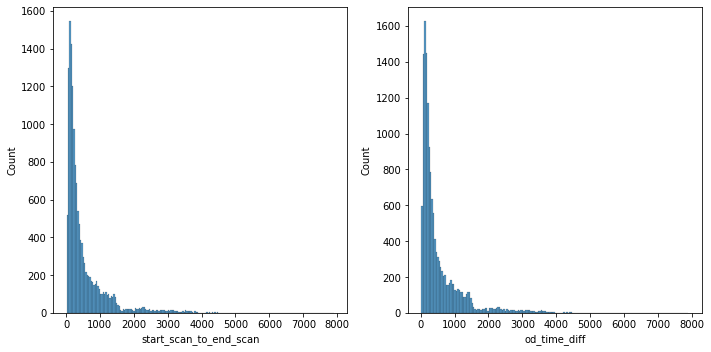

In [313]:
# Lets's first plot the two populations
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(trip['start_scan_to_end_scan'])

plt.subplot(1,2,2)
sb.histplot(trip['od_time_diff'])

plt.tight_layout()
plt.show()

Observation: as we can see both the populations are positively skewed hence we will have to perform a Kruskal Wallis test.

In [312]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no difference between the means of two populations
# Alternative Hypothesis (Ha): There is a significant difference between the means of two populations

alpha = 0.05

z_statistic, p_value = kruskal(trip['start_scan_to_end_scan'],trip['od_time_diff'])

if p_value < alpha:
    print(f"As {round(p_value,3)} is less than Alpha, we REJECT the null hypothesis, \nand hence, There is a significant difference between the means of two populations.")
else:
    print(f"As {round(p_value,3)} is greater than Alpha,we FAIL to reject the null hypothesis, \nand hence, There is no difference between the means of two populations.")


As 0.021 is less than Alpha, we REJECT the null hypothesis, 
and hence, There is a significant difference between the means of two populations.


#### Hypothesis testing 2

population 1 = 'actual_time'

population 2 = 'osrm_time'

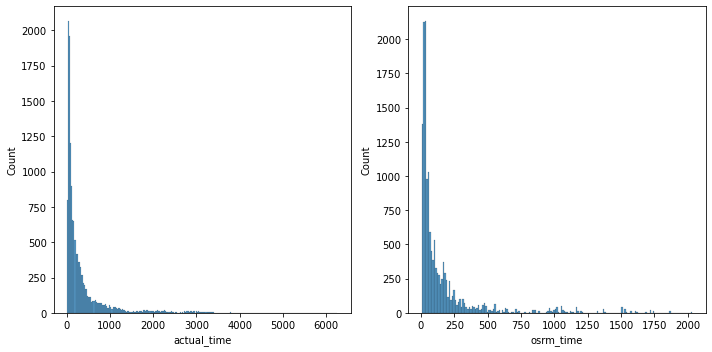

In [314]:
# Lets's first plot the two populations
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(trip['actual_time'])

plt.subplot(1,2,2)
sb.histplot(trip['osrm_time'])

plt.tight_layout()
plt.show()

Observation: as we can see both the populations are positively skewed hence we will have to perform a Kruskal Wallis test.

In [319]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no difference between the means of two populations
# Alternative Hypothesis (Ha): There is a significant difference between the means of two populations

alpha = 0.05

z_statistic, p_value = kruskal(trip['actual_time'],trip['osrm_time'])

if p_value < alpha:
    print(f"As {round(p_value,3)} is less than Alpha, we REJECT the null hypothesis, \nand hence, There is a significant difference between the means of two populations.")
else:
    print(f"As {round(p_value,3)} is greater than Alpha,we FAIL to reject the null hypothesis, \nand hence, There is no difference between the means of two populations.")


As 0.0 is less than Alpha, we REJECT the null hypothesis, 
and hence, There is a significant difference between the means of two populations.


#### Hypothesis testing 3

population 1 = 'actual_time'

population 2 = 'segment_actual_time_sum'

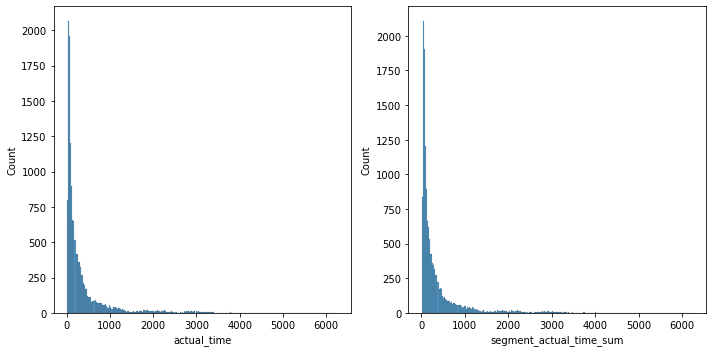

In [318]:
# Lets's first plot the two populations
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(trip['actual_time'])

plt.subplot(1,2,2)
sb.histplot(trip['segment_actual_time_sum'])

plt.tight_layout()
plt.show()

Observation: as we can see both the populations are positively skewed hence we will have to perform a Kruskal Wallis test.

In [320]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no difference between the means of two populations
# Alternative Hypothesis (Ha): There is a significant difference between the means of two populations

alpha = 0.05

z_statistic, p_value = kruskal(trip['actual_time'],trip['segment_actual_time_sum'])

if p_value < alpha:
    print(f"As {round(p_value,3)} is less than Alpha, we REJECT the null hypothesis, \nand hence, There is a significant difference between the means of two populations.")
else:
    print(f"As {round(p_value,3)} is greater than Alpha,we FAIL to reject the null hypothesis, \nand hence, There is no difference between the means of two populations.")


As 0.416 is greater than Alpha,we FAIL to reject the null hypothesis, 
and hence, There is no difference between the means of two populations.


#### Hypothesis testing 4

population 1 = 'osrm_distance'

population 2 = 'segment_osrm_distance_sum'

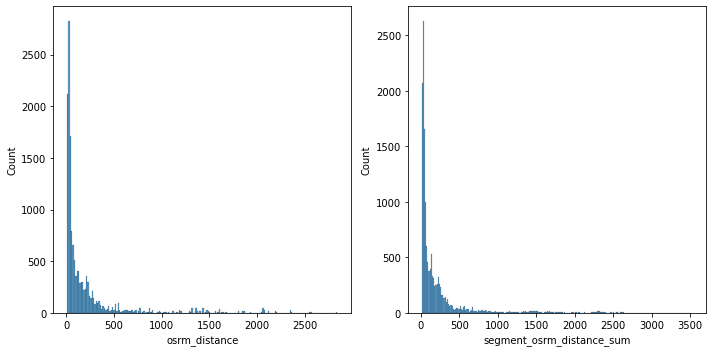

In [324]:
# Lets's first plot the two populations
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(trip['osrm_distance'])

plt.subplot(1,2,2)
sb.histplot(trip['segment_osrm_distance_sum'])

plt.tight_layout()
plt.show()

Observation: as we can see both the populations are positively skewed hence we will have to perform a Kruskal Wallis test.

In [325]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no difference between the means of two populations
# Alternative Hypothesis (Ha): There is a significant difference between the means of two populations

alpha = 0.05

z_statistic, p_value = kruskal(trip['osrm_distance'],trip['segment_osrm_distance_sum'])

if p_value < alpha:
    print(f"As {round(p_value,3)} is less than Alpha, we REJECT the null hypothesis, \nand hence, There is a significant difference between the means of two populations.")
else:
    print(f"As {round(p_value,3)} is greater than Alpha,we FAIL to reject the null hypothesis, \nand hence, There is no difference between the means of two populations.")


As 0.0 is less than Alpha, we REJECT the null hypothesis, 
and hence, There is a significant difference between the means of two populations.


#### Hypothesis testing 5

population 1 = 'osrm_time'

population 2 = 'segment_osrm_time_sum'

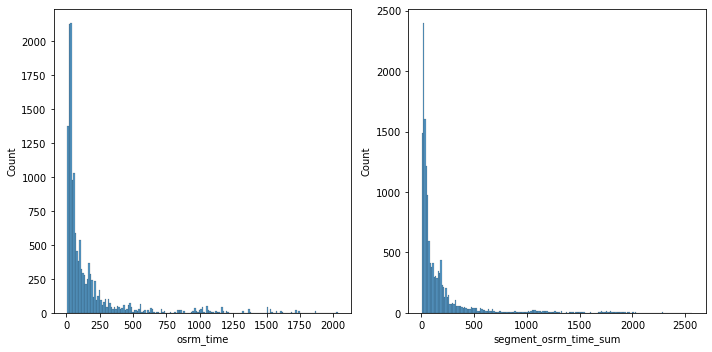

In [326]:
# Lets's first plot the two populations
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(trip['osrm_time'])

plt.subplot(1,2,2)
sb.histplot(trip['segment_osrm_time_sum'])

plt.tight_layout()
plt.show()

Observation: as we can see both the populations are positively skewed hence we will have to perform a Kruskal Wallis test.

In [327]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no difference between the means of two populations
# Alternative Hypothesis (Ha): There is a significant difference between the means of two populations

alpha = 0.05

z_statistic, p_value = kruskal(trip['osrm_time'],trip['segment_osrm_time_sum'])

if p_value < alpha:
    print(f"As {round(p_value,3)} is less than Alpha, we REJECT the null hypothesis, \nand hence, There is a significant difference between the means of two populations.")
else:
    print(f"As {round(p_value,3)} is greater than Alpha,we FAIL to reject the null hypothesis, \nand hence, There is no difference between the means of two populations.")


As 0.0 is less than Alpha, we REJECT the null hypothesis, 
and hence, There is a significant difference between the means of two populations.


### As we can see, from the above graphs, the data is super skewed, indicating to possibility of outliers, so let's detect outliers, if there are any and let's treat them.

In [330]:
num_cols = ['start_scan_to_end_scan','od_time_diff','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', ]

<Axes: >

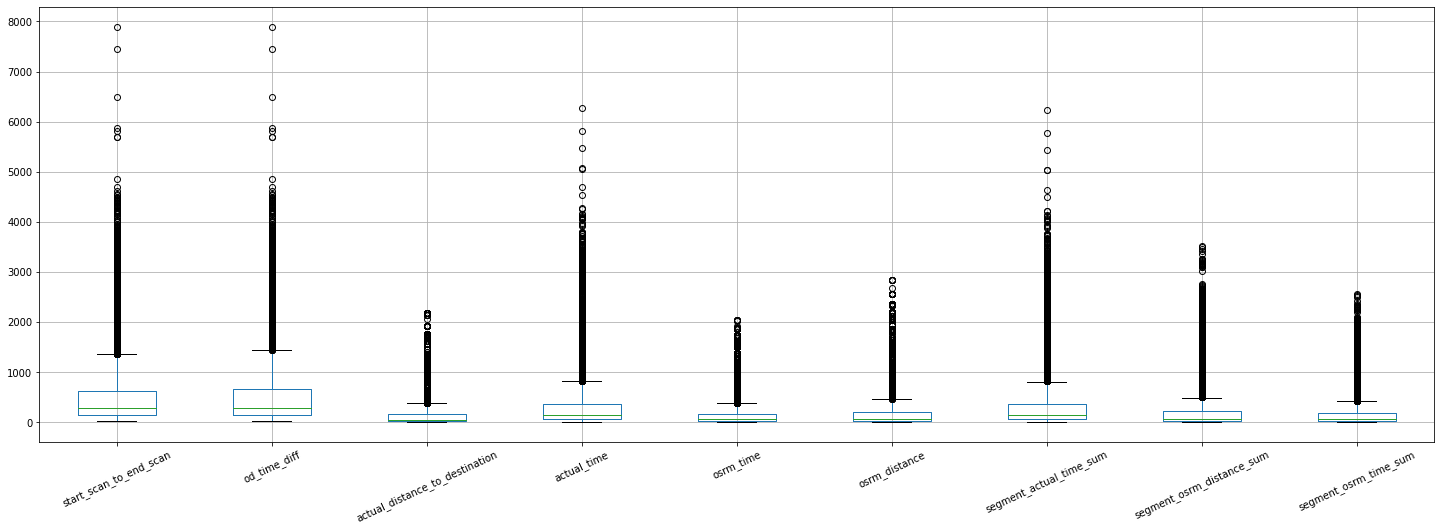

In [331]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))
plt.show()

Observation:
There lies a plethora of outliers in the respective columns.

### Handling the outliers using IQR method

In [332]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [338]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True) 

In [339]:
trip

,data,trip_year,trip_monthday,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek,route_schedule_uuid,route_type,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor
0,training,2018,09-12,9,12,0,37,2,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Karnataka,Tumkur,Veersagr,I,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,180.0,181.611874,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941
1,training,2018,09-12,9,12,0,37,2,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Maharashtra,Mumbai Hub,Mumbai,none,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,100.0,100.494935,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333
2,training,2018,09-12,9,12,0,37,2,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Karnataka,Bellary,Bellary,none,IND583101AAA,Karnataka,Bellary,Bellary,none,717.0,718.349042,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530
3,training,2018,09-12,9,12,0,37,2,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,Tamil Nadu,Chennai,Porur,DPC,IND602105AAB,Tamil Nadu,Chennai,Sriperumbudur,Dc,189.0,190.487849,24.597048,61.0,60.0,23.0,23.0,28.0647,28.0647,2.652174
4,training,2018,09-12,9,12,0,37,2,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Tamil Nadu,Chennai,Chrompet,DPC,IND600048AAA,Tamil Nadu,Chennai,Vandalur,Dc,98.0,98.005634,9.100510,24.0,24.0,13.0,13.0,12.0184,12.0184,1.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,test,2018,10-03,10,3,23,40,2,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,257.0,405.485842,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710
12702,test,2018,10-03,10,3,23,40,2,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,Haryana,FBD,Balabhgarh,DPC,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,60.0,60.590521,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000
12703,test,2018,10-03,10,3,23,40,2,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,421.0,422.119867,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000
12704,test,2018,10-03,10,3,23,40,2,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,347.0,348.512862,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860


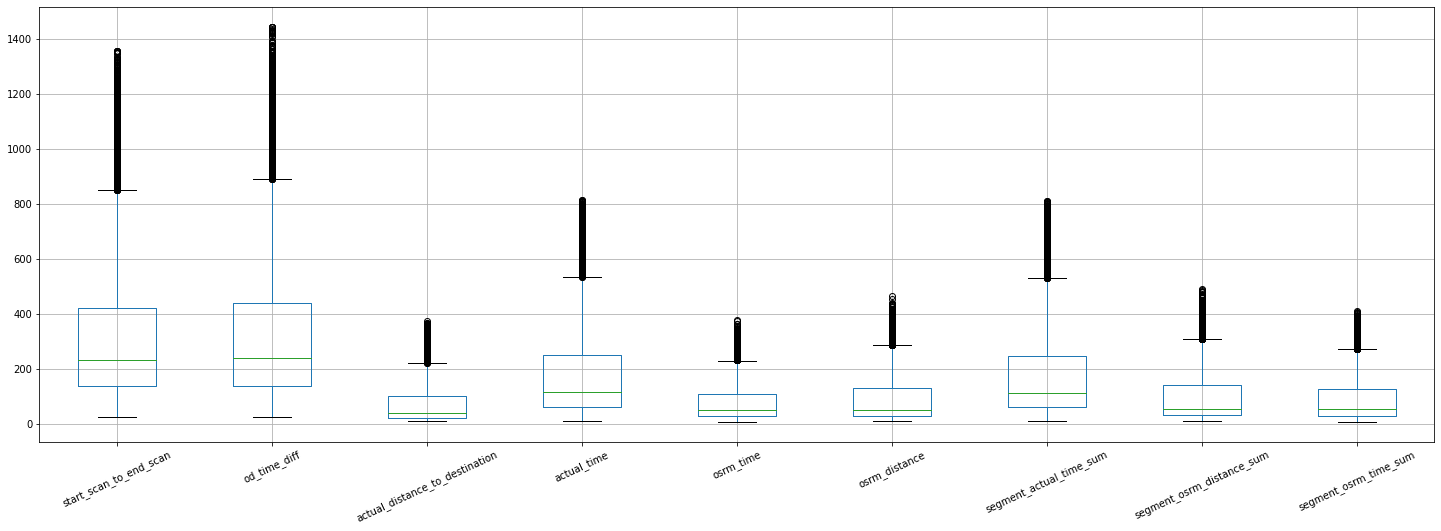

In [340]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))
plt.show()

## **Handling Categorical Variables**

### **One Hot Encoding**

In [345]:
trip['route_type'].value_counts()

Carting    8811
FTL        3895
Name: route_type, dtype: int64

In [346]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(trip['route_type'])

# Concatenate the one-hot encoded columns to the original DataFrame
trip = pd.concat([trip, one_hot_encoded], axis=1)
trip.drop(columns='route_type',inplace=True)

In [350]:
trip 

,data,trip_year,trip_monthday,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek,route_schedule_uuid,trip_uuid,source_center,source_state,source_city,source_place,source_code,destination_center,destination_state,destination_city,destination_place,destination_code,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum,factor,Carting,FTL
0,training,2018,09-12,9,12,0,37,2,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Karnataka,Tumkur,Veersagr,I,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,180.0,181.611874,73.186911,143.0,141.0,68.0,65.0,85.1110,84.1894,2.102941,1,0
1,training,2018,09-12,9,12,0,37,2,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Maharashtra,Mumbai Hub,Mumbai,none,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,100.0,100.494935,17.175274,59.0,59.0,15.0,16.0,19.6800,19.8766,3.933333,1,0
2,training,2018,09-12,9,12,0,37,2,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Karnataka,Bellary,Bellary,none,IND583101AAA,Karnataka,Bellary,Bellary,none,717.0,718.349042,127.448500,341.0,340.0,117.0,115.0,146.7918,146.7919,2.914530,0,1
3,training,2018,09-12,9,12,0,37,2,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,trip-153671055416136166,IND600116AAB,Tamil Nadu,Chennai,Porur,DPC,IND602105AAB,Tamil Nadu,Chennai,Sriperumbudur,Dc,189.0,190.487849,24.597048,61.0,60.0,23.0,23.0,28.0647,28.0647,2.652174,1,0
4,training,2018,09-12,9,12,0,37,2,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,trip-153671066201138152,IND600044AAD,Tamil Nadu,Chennai,Chrompet,DPC,IND600048AAA,Tamil Nadu,Chennai,Vandalur,Dc,98.0,98.005634,9.100510,24.0,24.0,13.0,13.0,12.0184,12.0184,1.846154,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,test,2018,10-03,10,3,23,40,2,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,257.0,405.485842,57.762332,83.0,82.0,62.0,62.0,73.4630,64.8551,1.338710,1,0
12702,test,2018,10-03,10,3,23,40,2,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,IND121004AAB,Haryana,FBD,Balabhgarh,DPC,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,60.0,60.590521,15.513784,21.0,21.0,12.0,11.0,16.0882,16.0883,1.750000,1,0
12703,test,2018,10-03,10,3,23,40,2,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,IND209304AAA,Uttar Pradesh,Kanpur,Central,6,421.0,422.119867,38.684839,282.0,281.0,48.0,88.0,58.9037,104.8866,5.875000,1,0
12704,test,2018,10-03,10,3,23,40,2,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,347.0,348.512862,134.723836,264.0,258.0,179.0,221.0,171.1103,223.5324,1.474860,1,0


### **Normalize/Standarize the numerical features using MinMaxScaler or StandardScaler**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [40]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [41]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [42]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,-1.452025e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


## **Recommendation:**

1. As a source station, Gurgaon Bilaspur has the most traffic, where as, as a city, Bengaluru has the most traffic, where as, as a state, Maharashtra has the most traffic, So Delhivery can incentivise the customers from these locations to reward their loyalty.
2. As a source station, Lalru from Punjab, Hazaaribag as a city and Arunachal Pradesh as a state are the least penetrated locations, There is huge potential in untapped zones, so delhivery can curate strategies to acquire customers from these locations and the surrounding area.
3. According to the analysis, over all, During the month starting, people and businesses are more likely to order for product deliveries, So Delhivery should advertise more in the month beginning, also, during the third week there seems to be a surge in orders, so Delhivery can push advertisements in the 1st and third weeks.
4. According to the analysis, during the day also, people are likely to create order more during 8 pm to 2 am, so Delhivery can start advertisements and push reminders 2 hours before that to confirm orders.
5. According to the analysis, customers prefer the carting route type option more than FTL, so process for the same can be smoothened and made seemless, so that it becomes a one click experience for the customer to create trips.
6. The Cutoff factor is a ratio between the actual time and osrm time, and it should be minimum, so Delhivery can strategise on finding the loop holes in the system, fill out the gaps, so that the cutoff factor tends to 1 oor less than 1. 
7. Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.
8. North, South and West Zones coridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.
9. From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.